## **INTRODUCTION TO COMPUTER VISION**

- Você treinará uma rede neural para **reconhecer itens de vestuário** de um conjunto de dados comum chamado Fashion MNIST. Ela tem 70 mil itens em 10 categorias diferentes.

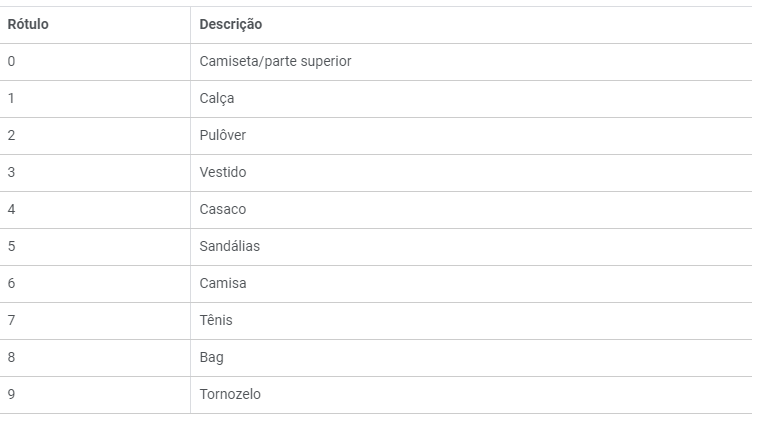

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
# Carregando os dados da API tf.keras.datasets
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
# load_data => esse objeto fornece dois conjuntos de duas listas
# valores de treinamento e testes, que representam gráficos que mostram intens de vestuário e os rótulos
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Exibindo uma imagem e um rótulo para ver
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
# Exibindo os dados do item 0
print(training_labels[0])
print(training_images[0])

In [ ]:
# Ao treinar uma rede neural é mais fácil tratar todos os valores entre 0 e 1, um processo chamado normalização
training_images  = training_images / 255.0
test_images = test_images / 255.0

- A ideia é ter um conjunto de dados para **treinamento** e outro que o modelo ainda não tenha encontrado para **ver se consegue classificar bem os valores**

In [ ]:
# Criando o modelo:
# Teremos três camadas:
# Sequential => define uma sequência de camadas na rede neural.
# Flatten => transforma um quadrado em um vetor unidimensional.
# Dense => adiciona uma camada de neurônios.
# As funções Activation => informam a cada camada de neurônios o que fazer.
# Relu => significa que, se X for maior que 0, o retorno será X. Caso contrário, retornará 0. Ela transmite apenas valores de 0 ou mais para a próxima camada na rede.
# Softmax => usa um conjunto de valores e escolhe o maior. Por exemplo, se o resultado da última camada for [0,1, 0,1, 0,05, 0,1, 9,5, 0,1, 0,05, 0,05, 0,05], ele evitará ter que classificar para o maior valor: ele retorna [0,0,0,0,1,0,0,0,0]

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# Criando um modelo e compilando-o com as funções optimizer e loss
# metrics => permite ao TensorFlow informar a precisão do treinamento comparando os resultados previstos com os rótulos
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando nos rótulos e dados de treinamento
# O objetivo é que o modelo descubra a relação entre os dados e rótulos de treinamento
model.fit(training_images, training_labels, epochs=5)

In [ ]:
# Enviando dados de teste que o modelo ainda não viu
# model.evaluate avalia e informa a perda e acurácia do modelo em relação aos dados de teste
model.evaluate(test_images, test_labels)

## **Exercicíos**

In [ ]:
# Retorna uma lista de 10 números, são probabilidades de que o valor classificado seja o rótulo correspondente
classifications = model.predict(test_images)
print(classifications[0])

- Aumentar os valores na camada **Dense**, aumenta o número de neurônios
- Aumentar os neurônios significa um melhor resultado, embora mais lento

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0
#test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])